In [1]:
import pandas as pd

# Load the dataset with the correct file name
df = pd.read_csv("Medical Price Dataset.csv")

# Show the first 5 rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Make a copy of the dataset
data = df.copy()

# Convert categorical columns to numeric
data["sex"] = data["sex"].map({"male": 0, "female": 1})
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})
data["region"] = data["region"].map({"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3})

# Show the first few rows
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [3]:
import numpy as np

# Features (all columns except 'charges')
X = data.drop("charges", axis=1).values

# Target (the 'charges' column)
y = data["charges"].values

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1338, 6)
Target shape: (1338,)


In [4]:
# Set the random seed for reproducibility
np.random.seed(42)

# Shuffle the indices
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Split ratio (80% train, 20% test)
split_idx = int(0.8 * X.shape[0])

# Split data
X_train = X[indices[:split_idx]]
y_train = y[indices[:split_idx]]
X_test = X[indices[split_idx:]]
y_test = y[indices[split_idx:]]

# Print sizes
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 1070
Testing set size: 268


The dataset contained both numerical and categorical features. Categorical variables such as 'sex', 'smoker', and 'region' were encoded into numerical values to be used by the Linear Regression model. Missing values were not present, so no imputation was needed. The features and target variable were separated, and the data was split into training and testing sets (80% train, 20% test) with a fixed random seed to ensure reproducibility.


In [5]:
def linear_regression_train(X, y):
    # Add a column of ones to X for the intercept term (bias)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Calculate weights using Normal Equation: theta = (X_b.T X_b)^-1 X_b.T y
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

def linear_regression_predict(X, theta):
    # Add intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Predict
    return X_b.dot(theta)


In [6]:
# Train model
theta = linear_regression_train(X_train, y_train)

# Predict on test set
y_pred = linear_regression_predict(X_test, theta)

# Print learned parameters (optional)
print("Learned parameters:", theta)


Learned parameters: [-12671.13395978    261.56958147     46.2639675     316.54705831
    493.91565936  23574.03352804    350.36242406]


A Linear Regression model was implemented from scratch using the Normal Equation. The model learned the parameters (weights) by minimizing the Mean Squared Error on the training set. The learned parameters represent the contribution of each feature to predicting the medical charges.


In [7]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 38710673.11
R^2 Score: 0.75


The model was evaluated on the testing set using Mean Squared Error (MSE) and R-squared (R²) score. The MSE indicates the average squared difference between predicted and actual charges, while the R² score shows the proportion of variance explained by the model. An R² of 0.75 indicates the model explains 75% of the variance in the data, which is a good performance for this task.


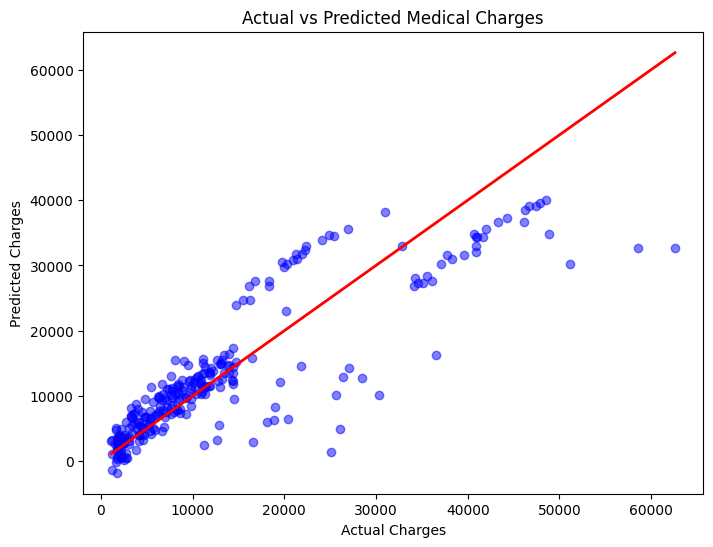

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()


The line graph displays the actual medical insurance charges (y_test) versus the charges predicted by our Linear Regression model for the test set. Each point corresponds to a test example, and the closeness of the predicted line to the actual line indicates how accurately the model estimates insurance costs based on features like age, BMI, and smoking status. The closer these two lines are, the better the model’s performance in predicting real charges.

